## Simulate a stationary time series

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
%matplotlib inline

$ARMA(0,1)$ Process: $v[k]= e[k]+0.99e[k-1]$

In [2]:
ar = np.array([1])
ma = np.array([1,0.99])

In [3]:
arma_process= sm.tsa.ArmaProcess(ar, ma)

No AR polynomial

In [4]:
arma_process.arroots

array([], dtype=float64)

$C(z^{-1})=1+0.99z^{-1}$ <br>
Root of this polynomial $1+0.99z^{-1}=0$ is $-1.010$ (in terms of $z^{-1}$)

In [5]:
arma_process.maroots

array([-1.01010101])

Since the roots are outside the unit circle (in terms of $z^{-1}$)

In [6]:
arma_process.isstationary & arma_process.isinvertible

True

Generate a time series $v[k]$ of 500 observations

In [7]:
vk_array=arma_process.generate_sample(500)

In [8]:
vk=pd.Series(vk_array)

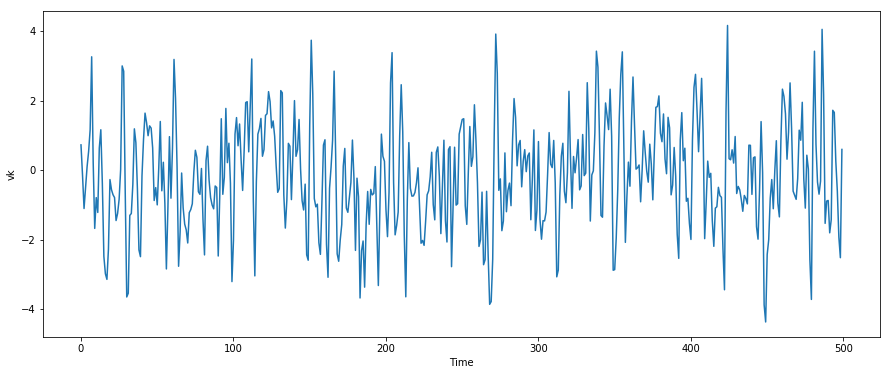

In [9]:
ylabel='vk'
xlabel='Time'
ax = vk.plot(figsize=(15,6))
ax.set(xlabel=xlabel, ylabel=ylabel);

## Time Series Modelling

Forget the process that we used to generate this time series. Assume we are given with the time series $v[k]$

In [10]:
# Step 1: Summary Statistic of vk
vk.describe()

count    500.000000
mean      -0.168085
std        1.518995
min       -4.365337
25%       -1.086261
50%       -0.232596
75%        0.858635
max        4.167673
dtype: float64

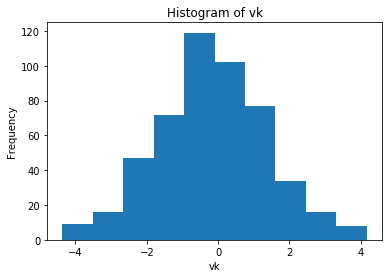

In [11]:
# Step 2: Test whether the series v[k] has fallen out of a joint Gaussian
title = 'Histogram of vk'
ylabel='Frequency'
xlabel='vk'
ax = vk.plot.hist(title=title)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [12]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

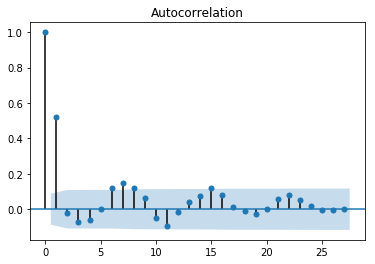

In [13]:
plot_acf(vk);

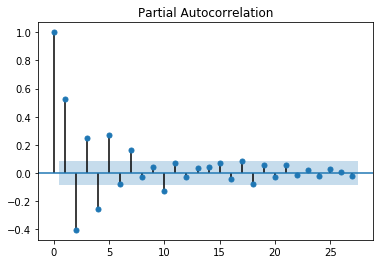

In [14]:
plot_pacf(vk);

In [31]:
# To get the numbers
acf_array = sm.tsa.stattools.acf(vk, nlags=20, fft=False)
pacf_array = sm.tsa.stattools.pacf(vk, nlags=20)

## Fitting an MA(1) Model

In [15]:
ma1mod = sm.tsa.arima.ARIMA(vk, order=(0,0,1)).fit()
print(ma1mod.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  500
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -723.311
Date:                Fri, 11 Jun 2021   AIC                           1452.622
Time:                        10:21:04   BIC                           1465.266
Sample:                             0   HQIC                          1457.583
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1637      0.092     -1.788      0.074      -0.343       0.016
ma.L1          0.9972      0.010    103.258      0.000       0.978       1.016
sigma2         1.0462      0.064     16.346      0.0

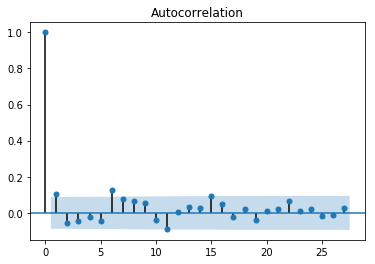

In [17]:
plot_acf(ma1mod.resid);

The resulting series has the characteristic of white-noise. BUT,

In [18]:
ma1mod.conf_int()

,0,1
const,-0.343144,0.015790
ma.L1,0.978237,1.016092
sigma2,0.920724,1.171599


The confidence interval of the MA co-efficient contains points in the range $(0.9782, 1.016)$. So our model set includes the possibility of non-invertible models as well. Hence the model MA(1) is not suitable for the given series. <br>
Despite the fact that the series is a MA(1) process, we are forced to fit someother suitable model because of the finite samples and estimation errors.